### 1. visualization before applying the Apriori algorithm

In [153]:
# importing libraries and creating a dataFrame
import numpy as np
import pandas as pd
import squarify
import matplotlib.pyplot as plt
# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [154]:
df = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

        ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

print(df)

[['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'], ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'], ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'], ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'], ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]


### In order to use apriori function, we need to transform our dataset into a one-hot encoded dataframe.

In [155]:
te=TransactionEncoder()
te_ary=te.fit(df).transform(df)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


#### Let’s select itemsets with a minimum of 70% Support

In [156]:
apriori(df, min_support=0.6)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


#### Support with column names

In [157]:
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Pants, Skirt)"


In [158]:
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate itemsets with confidence over 70%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


In [159]:
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


In [160]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

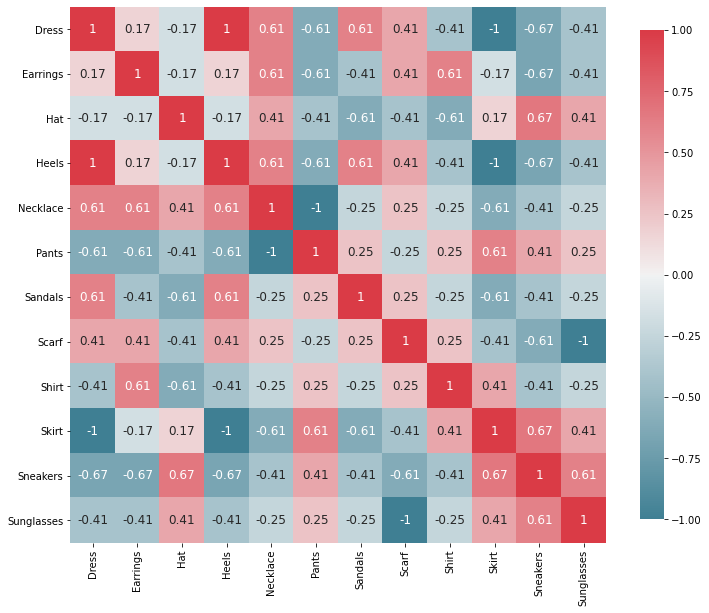

In [161]:
plot_correlation_map(df)

### 2. Same checkpoint but with a bigger dataset

In [183]:
df1 = pd.read_csv('Market_Basket_Optimisation.csv', header = None)

In [184]:
df1.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
df1_res = pd.DataFrame()
for i in range(len(df1.columns)):
    df1_res = df1_res.append(df1[i].value_counts())

In [191]:
df1_res.head(3)

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,tea,water spray,zucchini,napkins,asparagus
0,11.0,18.0,3.0,57.0,5.0,6.0,3.0,9.0,4.0,1.0,...,8.0,95.0,47.0,24.0,31.0,NaN,NaN,NaN,NaN,NaN
1,29.0,10.0,2.0,64.0,5.0,8.0,9.0,31.0,8.0,13.0,...,5.0,68.0,92.0,25.0,38.0,5.0,1.0,10.0,NaN,NaN
2,35.0,12.0,5.0,46.0,4.0,12.0,18.0,15.0,13.0,14.0,...,8.0,33.0,69.0,24.0,32.0,4.0,1.0,2.0,NaN,NaN


In [192]:
df1_sum = df1_res.sum()
df1_sum = df1_sum.sort_values(ascending=False)

In [193]:
df1_sum

mineral water    1788.0
eggs             1348.0
spaghetti        1306.0
french fries     1282.0
chocolate        1230.0
                  ...  
bramble            14.0
cream               7.0
napkins             5.0
water spray         3.0
 asparagus          1.0
Length: 120, dtype: float64

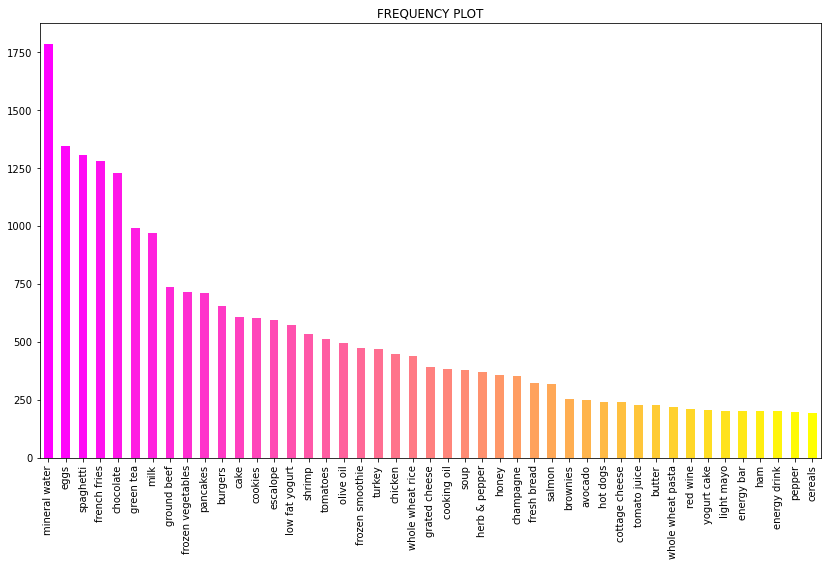

In [195]:
plt.figure(figsize=(14,8))
plt.title("FREQUENCY PLOT")
cnt = 45 # plot only first 'cnt' values
color = plt.cm.spring(np.linspace(0, 1, cnt))
df1_sum.head(cnt).plot.bar(color = color)
plt.xticks(rotation = 'vertical')
plt.grid(False)
plt.axis('on')
plt.show()

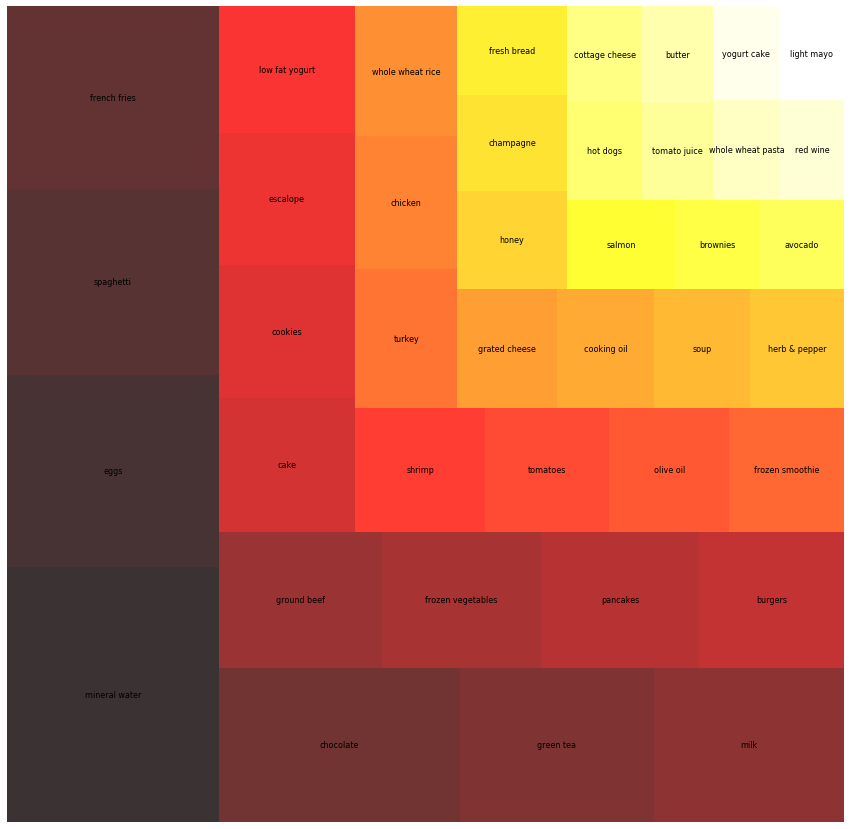

In [196]:
plt.figure(figsize=(15,15))
cnt = 40 # plot only first 'cnt' values
color = plt.cm.hot(np.linspace(0, 1, cnt))
df1_part = df1_sum.head(cnt)
squarify.plot(sizes = df1_part.values, label = df1_part.index, alpha=.8, color = color, text_kwargs={'fontsize':8})
plt.axis('off')
plt.show()

### Transformation

#### Before converting dataset to transaction view, we should convert pandas-data to list-data and then list-data to numpy-data.

In [208]:
arr = []
for i in range(df1.shape[0]):
    arr.append([str(df1.values[i,j]) for j in range(df1.shape[1])])

arr = np.array(arr)
print(arr.shape)

(7501, 20)


In [209]:
df1.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
te = TransactionEncoder()
df1 = te.fit_transform(arr)
df1 = pd.DataFrame(df1, columns = te.columns_)
print(df1.shape)

(7501, 121)


In [213]:
df1.head(3)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [214]:
df1 = df1.drop(columns=['nan'])
df1.head(3)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Analyze data with apriori rule

In [215]:
freq_rules = apriori(df1, min_support = 0.01, use_colnames = True)
freq_rules

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(mineral water, milk, ground beef)"
253,0.017064,"(mineral water, ground beef, spaghetti)"
254,0.015731,"(mineral water, milk, spaghetti)"
255,0.010265,"(mineral water, olive oil, spaghetti)"


In [216]:
freq_rules['length'] = freq_rules['itemsets'].apply(lambda x: len(x)) # adding 'length' column
freq_rules

,support,itemsets,length
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.010799,(barbecue sauce),1
3,0.014265,(black tea),1
4,0.011465,(body spray),1
...,...,...,...
252,0.011065,"(mineral water, milk, ground beef)",3
253,0.017064,"(mineral water, ground beef, spaghetti)",3
254,0.015731,"(mineral water, milk, spaghetti)",3
255,0.010265,"(mineral water, olive oil, spaghetti)",3


In [217]:
mask = freq_rules['length'] > 1 # creating mask for filtering with certain condition
filtered_freq_rules = freq_rules.loc[mask] # applying mask
filtered_freq_rules # printing the filtering result

,support,itemsets,length
75,0.011598,"(avocado, mineral water)",2
76,0.011465,"(cake, burgers)",2
77,0.017064,"(burgers, chocolate)",2
78,0.028796,"(eggs, burgers)",2
79,0.021997,"(french fries, burgers)",2
...,...,...,...
252,0.011065,"(mineral water, milk, ground beef)",3
253,0.017064,"(mineral water, ground beef, spaghetti)",3
254,0.015731,"(mineral water, milk, spaghetti)",3
255,0.010265,"(mineral water, olive oil, spaghetti)",3


###### So, in the end we can see all rules, which have certain length and which have certain minimum support. More and more organizations are discovering ways of using market basket analysis to gain useful insights into associations and hidden relationships